# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Wahyu Bagas Prastyo]
- **Email:** [wbagas700@gmail.com]
- **ID Dicoding:** [MC129D5Y0205]

## Menentukan Pertanyaan Bisnis

- Berapa Jumlah Peminjaman Sepeda Berdasarkan Musim
- Berapa Jumlah Peminjaman Sepeda Per Bulan.

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Data Wrangling

### Gathering Data

In [47]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [48]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [49]:
day_df.info()
day_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [50]:
hour_df.info()
hour_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset berisi informasi penyewaan sepeda harian.
- Terdapat beberapa kolom yang bisa dieksplorasi lebih lanjut seperti suhu, cuaca, dan jumlah pengguna.



In [51]:
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [52]:
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


### Cleaning Data

In [53]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [54]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore ...

In [55]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [56]:
day_df.season.value_counts().sort_index()


,count
season,
1,181
2,184
3,188
4,178


In [57]:
day_df.mnth.value_counts().sort_index()


,count
mnth,
1,62
2,57
3,62
4,60
5,62
6,60
7,62
8,62
9,60


Aggregasi Data Sesuai pertanyaan Bisnis


In [58]:
# Berapa Jumlah Peminjaman Sepeda Berdasarkan Musim?
seasonal_rentals = day_df.groupby("season")["cnt"].sum()
print(seasonal_rentals)


season
1     471348
2     918589
3    1061129
4     841613
Name: cnt, dtype: int64


In [59]:
# Berapa Jumlah Peminjaman Sepeda Per Bulan?
monthly_rentals = day_df.groupby("mnth")["cnt"].sum()
print(monthly_rentals)


mnth
1     134933
2     151352
3     228920
4     269094
5     331686
6     346342
7     344948
8     351194
9     345991
10    322352
11    254831
12    211036
Name: cnt, dtype: int64


In [60]:
data_terbaru_df = pd.merge(
    left=day_df,
    right=hour_df,
        how="left",
    left_on="dteday",   # Sesuaikan nama kolom jika perlu
    right_on="dteday"
)

data_terbaru_df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [61]:
# Simpan hasil gabungan dataset ke file CSV
data_terbaru_df.to_csv("data_terbaru.csv", index=False)

**Insight:**
- Menggabungkan dua dataset.

## Visualization & Explanatory Analysis

In [62]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
641,642,2012-10-03,4,1,10,0,3,1,2,0.657500,0.599133,0.793750,0.066546,728,6844,7572
12,13,2011-01-13,1,0,1,0,4,1,1,0.165000,0.150883,0.470417,0.301000,38,1368,1406
23,24,2011-01-24,1,0,1,0,1,1,1,0.097391,0.117930,0.491739,0.158330,86,1330,1416
598,599,2012-08-21,3,1,8,0,2,1,1,0.649167,0.601025,0.673750,0.072771,1081,5925,7006
162,163,2011-06-12,2,0,6,0,0,0,1,0.692500,0.643325,0.747917,0.163567,1467,2993,4460


In [63]:
byseason_df = day_df.groupby(by="season").agg({
    "cnt": "sum"
}).reset_index()


byseason_df.rename(columns={"cnt": "sum"}, inplace=True)

byseason_df

,season,sum
0,1,471348
1,2,918589
2,3,1061129
3,4,841613


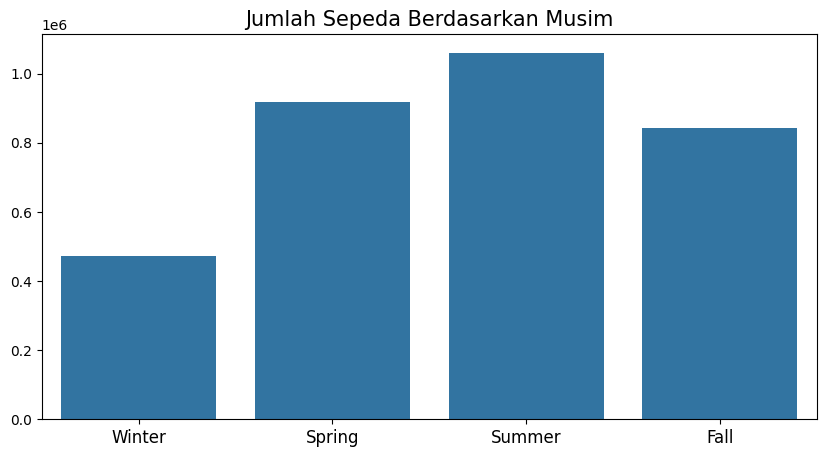

In [64]:
season_labels = {1: "Winter", 2: "Spring", 3: "Summer", 4: "Fall"}
plt.figure(figsize=(10, 5))  # Ukuran figure

sns.barplot(
    y="sum",
    x=byseason_df["season"].map(season_labels),
    data=byseason_df.sort_values(by="season", ascending=False),
)
plt.title("Jumlah Sepeda Berdasarkan Musim", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

### Pertanyaan 1:

### Pertanyaan 2:

Total Penggunaan Bike Sharing Berdasarkan Bulan:
    mnth     sum
0      1  134933
1      2  151352
2      3  228920
3      4  269094
4      5  331686
5      6  346342
6      7  344948
7      8  351194
8      9  345991
9     10  322352
10    11  254831
11    12  211036


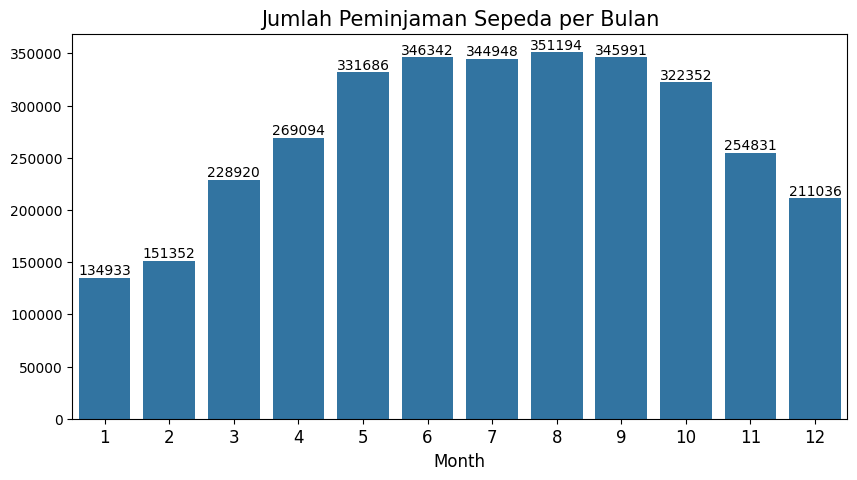

In [65]:
bymonth_df = day_df.groupby(by="mnth").agg({
    "cnt": "sum"
}).reset_index()


bymonth_df.rename(columns={"cnt": "sum"}, inplace=True)


print("Total Penggunaan Bike Sharing Berdasarkan Bulan:")
print(bymonth_df)


plt.figure(figsize=(10, 5))
sns.barplot(
    y="sum",
    x="mnth",
    data=bymonth_df.sort_values(by="mnth", ascending=True),
)


for index, row in bymonth_df.iterrows():
    plt.text(row['mnth'] - 1, row['sum'], f"{int(row['sum'])}", ha="center", va="bottom", fontsize=10)

plt.title("Jumlah Peminjaman Sepeda per Bulan", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel("Month", fontsize=12)
plt.tick_params(axis="x", labelsize=12)
plt.show()


**Insight:**

- Jumlah Peminjaman Sepeda Berdasarkan Musim.
- Jumlah Peminjaman Sepeda per Bulan.


## Analisis Lanjutan (Opsional)

## Conclusion

# Conclusion Pertanyaan 1 :
- Dari visualisasi penyewaan sepeda berdasarkan musim, terlihat bahwa jumlah penyewaan tertinggi terjadi pada musim panas (Summer), diikuti oleh musim semi (Spring) dan musim gugur (Fall), sementara jumlah penyewaan terendah terjadi pada musim dingin (Winter).
- Hal ini menunjukkan bahwa cuaca yang lebih hangat di musim panas mendorong lebih banyak orang untuk menggunakan sepeda.
Sebaliknya, musim dingin memiliki jumlah penyewaan paling sedikit, kemungkinan - karena suhu yang dingin dan cuaca buruk seperti hujan atau salju yang membuat bersepeda menjadi kurang nyaman..

# Conclution pertanyaan 2 :
- Dari visualisasi total penyewaan sepeda per bulan, terlihat bahwa jumlah penyewaan tertinggi terjadi pada bulan-bulan musim panas.
- Hal ini menunjukkan bahwa cuaca yang lebih hangat berkontribusi terhadap peningkatan penggunaan sepeda, kemungkinan karena lebih banyak orang menikmati aktivitas luar ruangan.
- Sebaliknya, penyewaan sepeda lebih rendah pada bulan-bulan musim dingin (Desember hingga Februari), yang mengindikasikan bahwa suhu dingin dan kondisi cuaca yang kurang mendukung mengurangi minat pengguna dalam menyewa sepeda.
